In [1]:
using Plots, CSV, DataFrames

In [2]:
features = CSV.read("features.csv", DataFrame; select = [:Element, :Polariz, :IP, :Rcov]);
nobles = DataFrame(
    Element = ["He", "Ne", "Ar", "Kr", "Xe", "Rn",],
    Polariz   = [0.2050522, 0.39432, 1.6411, 2.4844, 4.044, 5.3],
    IP        = [24.587387, 21.56454, 15.759610, 13.99961, 12.12984, 10.7485],
    Rcov      = [0.37, 0.62, 1.01, 1.16, 1.36, 1.46],
);
append!(features, nobles);
# show(features, allrows=true, allcols=true);

In [3]:
function ptable(df::DataFrame, feature::String, title::String, outfile::String)

    # (symbol, x, y)
    elements = [
        # Period 1
        ("H", 1, 7), ("He", 18, 7),
        # Period 2
        ("Li", 1, 6), ("Be", 2, 6), ("B", 13, 6), ("C", 14, 6), ("N", 15, 6), ("O", 16, 6), ("F", 17, 6), ("Ne", 18, 6),
        # Period 3
        ("Na", 1, 5), ("Mg", 2, 5), ("Al", 13, 5), ("Si", 14, 5), ("P", 15, 5), ("S", 16, 5), ("Cl", 17, 5), ("Ar", 18, 5),
        # Period 4
        ("K", 1, 4), ("Ca", 2, 4), ("Sc", 3, 4), ("Ti", 4, 4), ("V", 5, 4), ("Cr", 6, 4), ("Mn", 7, 4), ("Fe", 8, 4), ("Co", 9, 4), 
        ("Ni", 10, 4), ("Cu", 11, 4), ("Zn", 12, 4), ("Ga", 13, 4), ("Ge", 14, 4), ("As", 15, 4), ("Se", 16, 4), ("Br", 17, 4), ("Kr", 18, 4),
        # Period 5
        ("Rb", 1, 3), ("Sr", 2, 3), ("Y", 3, 3), ("Zr", 4, 3), ("Nb", 5, 3), ("Mo", 6, 3), ("Tc", 7, 3), ("Ru", 8, 3), ("Rh", 9, 3), 
        ("Pd", 10, 3), ("Ag", 11, 3), ("Cd", 12, 3), ("In", 13, 3), ("Sn", 14, 3), ("Sb", 15, 3), ("Te", 16, 3), ("I", 17, 3),  ("Xe", 18, 3),
        # Period 6 (main block + lanthanides placeholder)
        ("Cs", 1, 2), ("Ba", 2, 2), ("*", 3, 2), ("Hf", 4, 2), ("Ta", 5, 2), ("W", 6, 2), ("Re", 7, 2), ("Os", 8, 2), ("Ir", 9, 2), 
        ("Pt", 10, 2), ("Au", 11, 2), ("Hg", 12, 2), ("Tl", 13, 2), ("Pb", 14, 2), ("Bi", 15, 2),  ("Po", 16, 2), ("At", 17, 2), ("Rn", 18, 2),
        # Period 7 (main block + actinides placeholder)
        ("Fr", 1, 1), ("Ra", 2, 1), ("**", 3, 1), ("Rf", 4, 1), ("Db", 5, 1), ("Sg", 6, 1), ("Bh", 7, 1), ("Hs", 8, 1), ("Mt", 9, 1),   
        ("Ds", 10, 1), ("Rg", 11, 1), ("Cn", 12, 1), ("Nh", 13, 1),  ("Fl", 14, 1),  ("Mc", 15, 1),  ("Lv", 16, 1), ("Ts", 17, 1), ("Og", 18, 1),
        # Lanthanides (Period 6, placed below at y=0)
        ("La", 3, 0), ("Ce", 4, 0), ("Pr", 5, 0), ("Nd", 6, 0), ("Pm", 7, 0), ("Sm", 8, 0), ("Eu", 9, 0), ("Gd", 10, 0), ("Tb", 11, 0),  
        ("Dy", 12, 0), ("Ho", 13, 0), ("Er", 14, 0), ("Tm", 15, 0),  ("Yb", 16, 0),  ("Lu", 17, 0),
        # Actinides (Period 7, placed below at y=-1)
        ("Ac", 3, -1), ("Th", 4, -1),  ("Pa", 5, -1), ("U", 6, -1), ("Np", 7, -1), ("Pu", 8, -1), ("Am", 9, -1), ("Cm", 10, -1),
        ("Bk", 11, -1), ("Cf", 12, -1), ("Es", 13, -1), ("Fm", 14, -1), ("Md", 15, -1), ("No", 16, -1), ("Lr", 17, -1)
    ];
    
    x = [el[2] for el ∈ elements];
    y = [el[3] for el ∈ elements];
    symbols = [el[1] for el ∈ elements];
    
    # Create the scatter plot with empty blue squares
    p = scatter(x, y,
        markersize=22,           # Size of the squares
        marker=:square,          
        markerstrokewidth=1,     # Width of the outline
        markerstrokecolor=:blue, # Blue outline
        markercolor=:white,      # White fill 
        label="",                
        aspect_ratio=:equal,     # Keep the grid square-like
        xlim=(0, 19), ylim=(-2, 8) 
    )
    
    # Add element symbols and annotations
    for i ∈ 1:length(elements)
        # Skip annotation for placeholders "*" and "**"
        if symbols[i] != "*" && symbols[i] != "**"
            # Symbol above the point
            annotate!(x[i], y[i] + 0.2, text(symbols[i], :center, 12))
            value_vec = features[df.Element .== symbols[i],feature]
            if !isempty(value_vec)
                annotate!(x[i], y[i] - 0.2, text("$(round(value_vec[1], digits=3))", :center, 8))
            end
        else
            # Only show the placeholder symbol
            annotate!(x[i], y[i], text(symbols[i], :center, 12))
        end
    end
    
    plot!(title="\n"*title, xticks=false, yticks=false, xlabel="", ylabel="", size=(1000, 600), axis=false);
    display(p);
    savefig(outfile);
    
    return nothing
end;

------------------------------------

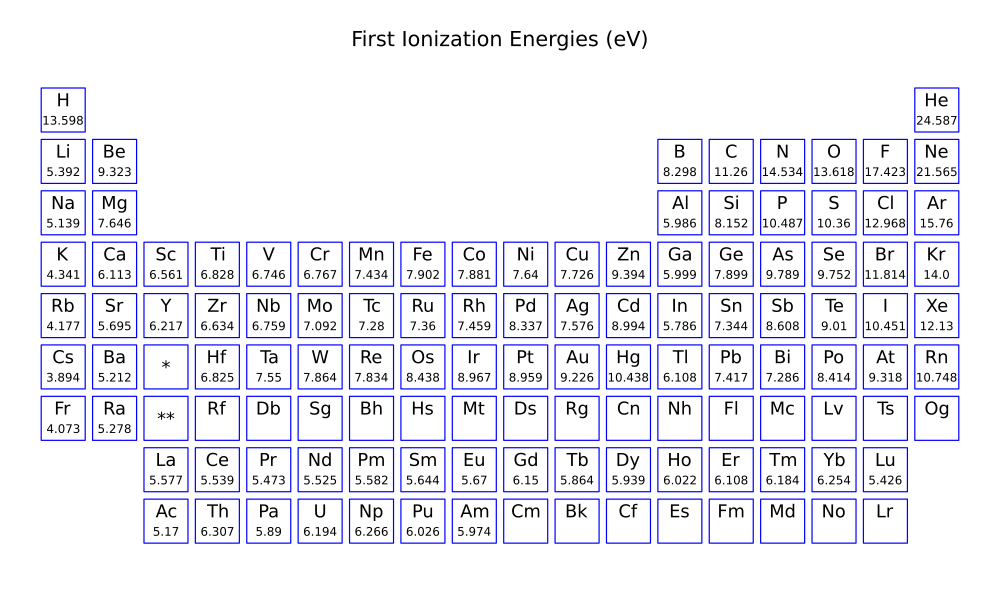

In [4]:
ptable(features, "IP", "First Ionization Energies (eV)", "ptable_IP.png")

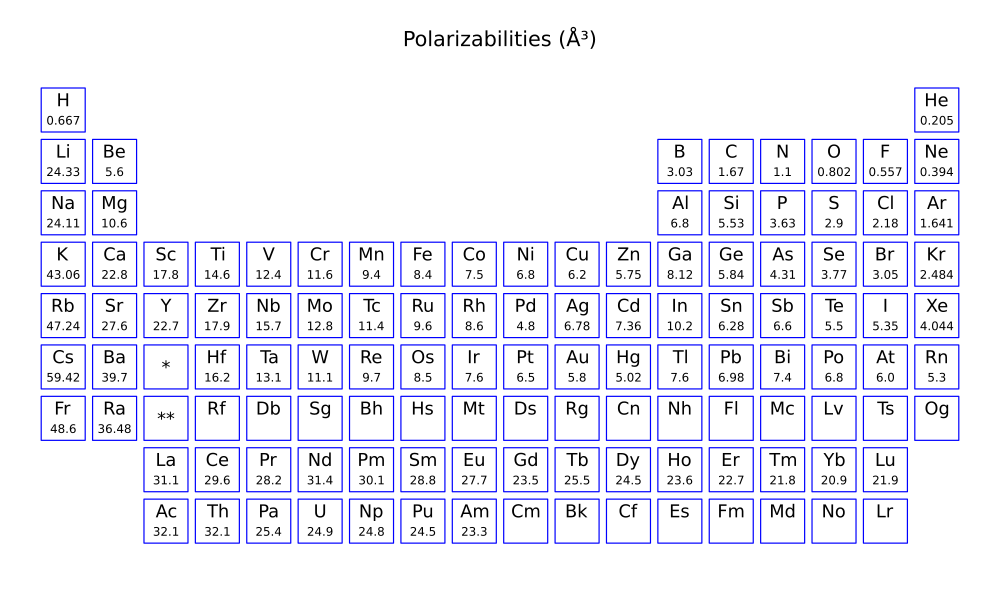

In [5]:
ptable(features, "Polariz", "Polarizabilities (Å³)", "ptable_Polariz.png")